<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
#Provide a boxplot for the "Median value of owner-occupied homes"

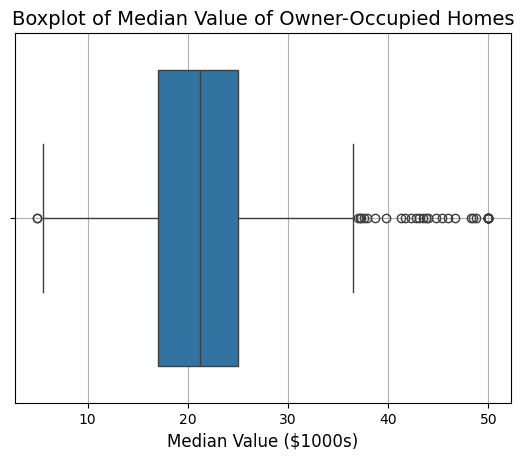

In [7]:
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes', fontsize=14)
pyplot.xlabel('Median Value ($1000s)', fontsize=12)
pyplot.grid(True)
pyplot.show()
pyplot.show()

In [ ]:
#Provide a  bar plot for the Charles river variable

<ipython-input-16-dcb5755e4f28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=boston_df, x='CHAS', palette='pastel')


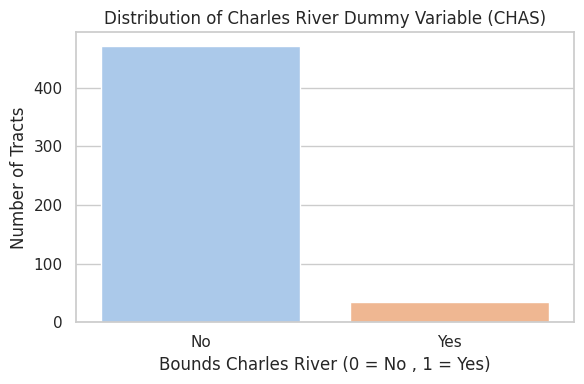

In [16]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(6, 4))
sns.countplot(data=boston_df, x='CHAS', palette='pastel')
pyplot.title('Distribution of Charles River Dummy Variable (CHAS)')
pyplot.xlabel('Bounds Charles River (0 = No , 1 = Yes)')
pyplot.ylabel('Number of Tracts')
pyplot.xticks([0, 1], ['No', 'Yes'])
pyplot.tight_layout()
pyplot.show()

In [ ]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<ipython-input-20-98028f8014aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV', palette='muted')


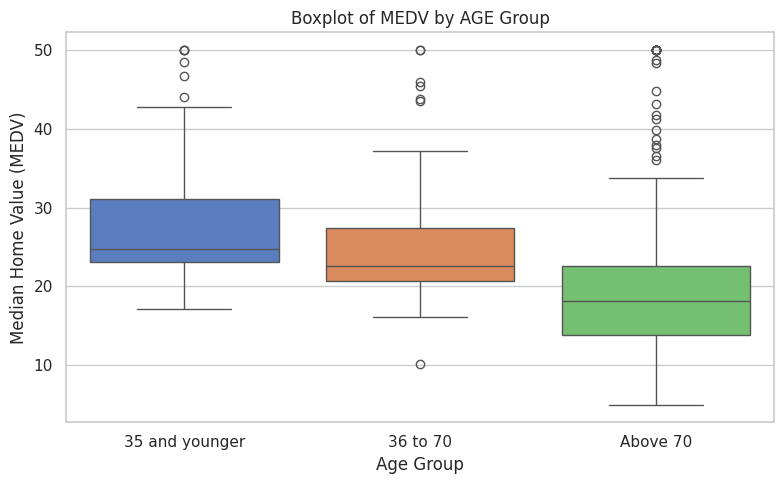

In [20]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '36 to 70', 'Above 70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 5))
sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV', palette='muted')
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Home Value (MEDV)')
pyplot.tight_layout()
pyplot.show()

In [ ]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

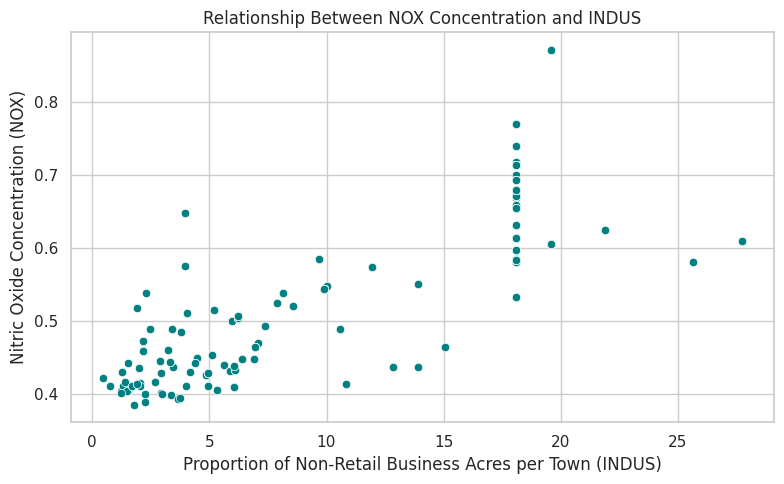

In [23]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 5))
sns.scatterplot(data=boston_df, x='INDUS', y='NOX', color='teal')
pyplot.title('Relationship Between NOX Concentration and INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.tight_layout()
pyplot.show()

In [ ]:
The scatter plot revealed a slight positive correlation between between Nitric oxide concentrations and the proportion of non-retail business acres per town, which means more industrial areas are associated with higher air pollution,

In [ ]:
#Create a histogram for the pupil to teacher ratio variable

In [24]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [25]:
ratings_df = pd.read_csv(ratings_url)

In [26]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [28]:
ratings_df['PTRATIO'] = ratings_df['students'] / ratings_df['prof']

In [29]:
ratings_df['PTRATIO'].head()

0    24.0
1    86.0
2    76.0
3    77.0
4     8.5
Name: PTRATIO, dtype: float64

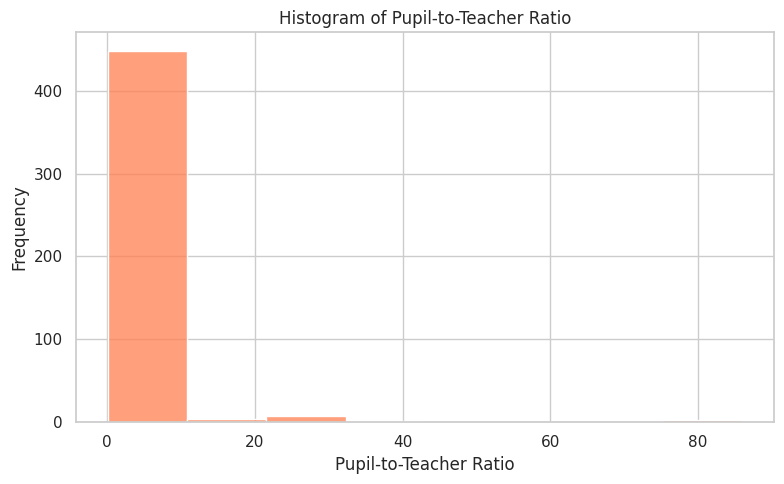

In [40]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 5))
sns.histplot(ratings_df['PTRATIO'], bins=8, kde=False, color='coral')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.tight_layout()
pyplot.show()